## 2022-08-06: Pipeline Component Development Example

*Last Updated*: 2022-08-06

### Authors

* Kevin Chu (kevin@velexi.com)


### Overview

This Jupyter notebook provides an example a notebook designed to facilitate rapid experimentation and development of a data pipeline component (i.e., a single data processing stage).

The example data pipeline component is defined by the following signature:

* __input__: the (R, G, B) channels of a color image (stored as 2D numpy arrays)

* __output__: a grayscale image (stored as a 2D numpy array)

* __data processing__: convert the color image to a grayscale image

### Structure of Notebook

* __Data Processing Functions__: implementations, basic documentation, and unit tests for
  data pipeline component

* __Experimentation & Development__: configure experiment, prepare data, transform data using data processing functions, and analyze results

### Data Processing Functions

#### `convert_to_grayscale_1`

In [1]:
# --- Imports

# Standard library
import typing

# External packages
import cv2
import numpy as np


# --- Function

def convert_to_grayscale_1(R: np.ndarray, G: np.ndarray, B: np.ndarray) -> np.ndarray:
    """
    TODO
    """
    # --- Check arguments
    
    # Convert color values in the interval [0, 1) with type 'float32'
    
    if R.dtype == 'float64':
        R = R.astype('float32')
    elif np.issubdtype(R.dtype, np.integer):
        R = (R/255).astype('float32')

    if G.dtype == 'float64':
        G = G.astype('float32')
    elif np.issubdtype(G.dtype, np.integer):
        G = (G/255).astype('float32')

    if B.dtype == 'float64':
        B = B.astype('float32')
    elif np.issubdtype(B.dtype, np.integer):
        B = (B/255).astype('float32')

    # --- Convert image to grayscale

    gray = cv2.cvtColor(np.dstack((B, G, R)), cv2.COLOR_BGR2GRAY)
    
    return gray

In [2]:
# --- Unit Tests

# Preparations
dims = (100, 200)
R = 0.25 * np.ones(dims).astype('float32')
G = 0.5 * np.ones(dims).astype('float32')
B = 0.75 * np.ones(dims).astype('float32')

# Exercise functionalityb
gray = convert_to_grayscale_1(R, G, B)

# Check results
assert(isinstance(gray, np.ndarray))
assert(gray.shape == dims)

#### `convert_to_grayscale_2`

In [3]:
# --- Imports

# Standard library
import typing

# External packages
import cv2
import numpy as np


# --- Function

def convert_to_grayscale_2(R: np.ndarray, G: np.ndarray, B: np.ndarray) -> np.ndarray:
    """
    TODO
    """
    # --- Check arguments

    # Convert color values in the interval [0, 1) with type 'float32'
    
    if R.dtype == 'float64':
        R = R.astype('float32')
    elif np.issubdtype(R.dtype, np.integer):
        R = (R/255).astype('float32')

    if G.dtype == 'float64':
        G = G.astype('float32')
    elif np.issubdtype(G.dtype, np.integer):
        G = (G/255).astype('float32')

    if B.dtype == 'float64':
        B = B.astype('float32')
    elif np.issubdtype(B.dtype, np.integer):
        B = (B/255).astype('float32')

    # --- Convert image to grayscale

    gray = (B + G + R) / 3
    
    return gray

In [4]:
# --- Unit Tests

# Preparations
dims = (100, 200)
R = 0.25 * np.ones(dims).astype('float32')
G = 0.5 * np.ones(dims).astype('float32')
B = 0.75 * np.ones(dims).astype('float32')

# Exercise functionalityb
gray = convert_to_grayscale_2(R, G, B)

# Check results
assert(isinstance(gray, np.ndarray))
assert(gray.shape == dims)

### Experimentation & Development

In [5]:
#### Experiment Configuration

# Set data pipeline function
pipeline_func = convert_to_grayscale_2
pipeline_func = convert_to_grayscale_1

#### Imports

In [6]:
# --- Imports

import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from PIL import ImageFilter

#### Prepare Data

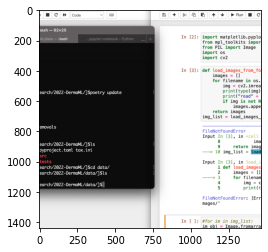

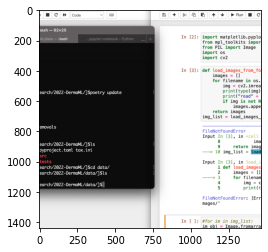

In [7]:
# --- Load image for experiment

# Load image
image_path = os.path.join("..", "data", "source", "pipeline-component-development",
                          "grayscale-conversion-test-image-01.png")

image = cv2.imread(image_path)

# Check image
plt.imshow(image)
plt.show()

# Extract (R, G, B)
(B, G, R) = cv2.split(image)
plt.imshow(np.dstack((B, G, R)))
plt.show()

#### Process Data

In [8]:
# Execute data pipeline component

output = pipeline_func(R, G, B)

#### Display Output

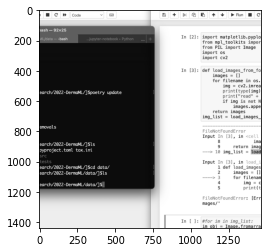

In [9]:
# Display output image
plt.imshow(np.dstack((output, output, output)))
plt.show()